<a href="https://colab.research.google.com/github/Nokyn1/ITMO/blob/main/notebooks/Unit%203%20-%20Vision%20Transformers/ViT_segmantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from transformers import pipeline
from PIL import Image
import requests

segmentation = pipeline("image-segmentation", "facebook/maskformer-swin-base-coco")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

results = segmentation(images=image, subtask="panoptic")
results

config.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/411M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/utils/deprecation.py:172: FutureWarning: `max_size` is deprecated and removed starting from version 4.27.0 for `MaskFormerImageProcessor.__init__`.
  return func(*args, **kwargs)
Device set to use cpu
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.993197,
  'label': 'remote',
  'mask': <PIL.Image.Image image mode=L size=640x480>},
 {'score': 0.997852,
  'label': 'cat',
  'mask': <PIL.Image.Image image mode=L size=640x480>},
 {'score': 0.998006,
  'label': 'remote',
  'mask': <PIL.Image.Image image mode=L size=640x480>},
 {'score': 0.997469,
  'label': 'cat',
  'mask': <PIL.Image.Image image mode=L size=640x480>}]

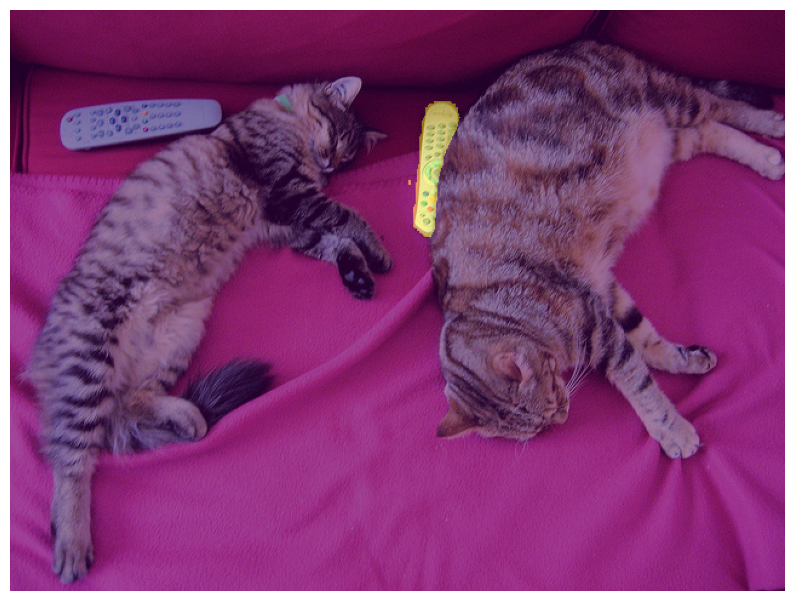

In [12]:
# Наложение масок на оригинальное изображение
import numpy as np
import matplotlib.pyplot as plt

# Конвертируем изображение в массив numpy
image_np = np.array(image)

# Создаем изображение с наложенными масками
plt.figure(figsize=(10, 10))
plt.imshow(image_np)
plt.imshow(results[0]['mask'], alpha=0.5)  # alpha - прозрачность масок
plt.axis('off')
plt.show()